In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 9s 2us/step


In [2]:
# scaling colors to range 0-1
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [3]:
class_names = ['Koszulka', 'Spodnie', 'Sweter', 'Sukienka', 'Płaszcz', 'Sandał', 'Koszula', 'Tenisówka', 'Torebka', 'Trzewik']

In [4]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
# alternative
#
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28,28]),
#     tf.keras.layers.Dense(300, activation='relu'),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# loss function and optimizer
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# alternative
# model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [7]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7057 - accuracy: 0.7663 - val_loss: 0.5007 - val_accuracy: 0.8286
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4845 - accuracy: 0.8320 - val_loss: 0.4541 - val_accuracy: 0.8356
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4396 - accuracy: 0.8452 - val_loss: 0.4213 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4149 - accuracy: 0.8550 - val_loss: 0.3956 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3940 - accuracy: 0.8611 - val_loss: 0.3937 - val_accuracy: 0.8610
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3777 - accuracy: 0.8661 - val_loss: 0.3953 - val_accuracy: 0.8622
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3650 - accuracy: 0.8705 - val_loss: 0.3701 - val_accuracy

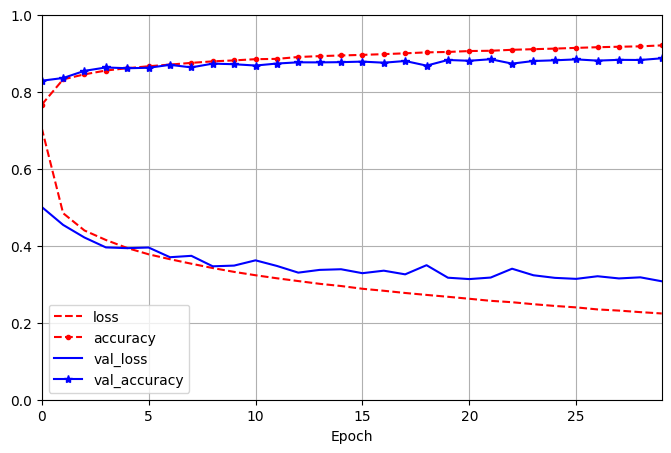

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel='Epoch', style=['r--', 'r--.', 'b-', 'b-*']
)
plt.show()

In [9]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3232 - accuracy: 0.8856


[0.3232048451900482, 0.8855999708175659]

In [10]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 1s 840ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [11]:
import numpy as np

y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [12]:
np.array(class_names)[y_pred]

array(['Trzewik', 'Sweter', 'Spodnie'], dtype='<U9')